In [1]:
from fastai.vision.all import *
# from utils import *

In [2]:
path = Path('/root/Documents/images')

In [3]:
path.ls()

(#144) [Path('/root/Documents/images/Amblyglyphidodon aureus'),Path('/root/Documents/images/Carassius auratus'),Path('/root/Documents/images/Abudefduf vaigiensis'),Path('/root/Documents/images/Cyprinella lutrensis'),Path('/root/Documents/images/Luxilus cornutus'),Path('/root/Documents/images/Chrysiptera taupou'),Path('/root/Documents/images/Phoxinus phoxinus'),Path('/root/Documents/images/Abudefduf sexfasciatus'),Path('/root/Documents/images/Notropis hudsonius'),Path('/root/Documents/images/Hesperoleucus symmetricus')...]

In [4]:
df_path = Path('/root/Documents/')
# df_path = Path('/workspace/Notebooks/')
df = pd.read_csv(df_path/"csv/families_3.csv")

In [5]:
set(df['Family'])

{'Centrarchidae', 'Cyprinidae', 'Pomacentridae'}

In [6]:
df

,Order,Family,Subfamily,Genus,Specie,fname,is_valid
0,Cypriniformes,Cyprinidae,Xenocyprinae,Hypophthalmichthys,Hypophthalmichthys molitrix,Hypophthalmichthys molitrix/35458230.jpg,False
1,Perciformes,Pomacentridae,Pomacentrinae,Dascyllus,Dascyllus trimaculatus,Dascyllus trimaculatus/13260279.jpg,False
2,Perciformes,Centrarchidae,NaN,Micropterus,Micropterus dolomieu,Micropterus dolomieu/94521526.jpg,False
3,Cypriniformes,Cyprinidae,Cyprininae,Cyprinus,Cyprinus carpio,Cyprinus carpio/89160603.jpg,False
4,Perciformes,Pomacentridae,Pomacentrinae,Abudefduf,Abudefduf sordidus,Abudefduf sordidus/41710167.jpg,False
...,...,...,...,...,...,...,...
86383,Cypriniformes,Cyprinidae,Gobioninae,Pseudorasbora,Pseudorasbora parva,Pseudorasbora parva/65482784.jpg,True
86384,Cypriniformes,Cyprinidae,Ex-danioninae,Parazacco,Parazacco spilurus,Parazacco spilurus/61744233.jpg,True
86385,Perciformes,Centrarchidae,NaN,Micropterus,Micropterus salmoides,Micropterus salmoides/19167043.jpg,True
86386,Perciformes,Centrarchidae,NaN,Lepomis,Lepomis macrochirus,Lepomis macrochirus/24903221.jpg,True


# Non-branch

In [7]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(4),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

In [8]:
dls.train_ds, dls.valid_ds

((#69110) [(PILImage mode=RGB size=768x1024, TensorCategory(62)),(PILImage mode=RGB size=1024x768, TensorCategory(58)),(PILImage mode=RGB size=768x1024, TensorCategory(79)),(PILImage mode=RGB size=1024x768, TensorCategory(52)),(PILImage mode=RGB size=768x1024, TensorCategory(6)),(PILImage mode=RGB size=1024x768, TensorCategory(69)),(PILImage mode=RGB size=1024x715, TensorCategory(130)),(PILImage mode=RGB size=1024x768, TensorCategory(108)),(PILImage mode=RGB size=1024x768, TensorCategory(118)),(PILImage mode=RGB size=1024x768, TensorCategory(53))...],
 (#17278) [(PILImage mode=RGB size=1024x768, TensorCategory(92)),(PILImage mode=RGB size=768x1024, TensorCategory(117)),(PILImage mode=RGB size=1024x768, TensorCategory(83)),(PILImage mode=RGB size=1024x768, TensorCategory(83)),(PILImage mode=RGB size=768x1024, TensorCategory(26)),(PILImage mode=RGB size=576x1024, TensorCategory(79)),(PILImage mode=RGB size=988x742, TensorCategory(8)),(PILImage mode=RGB size=768x1024, TensorCategory(48)),

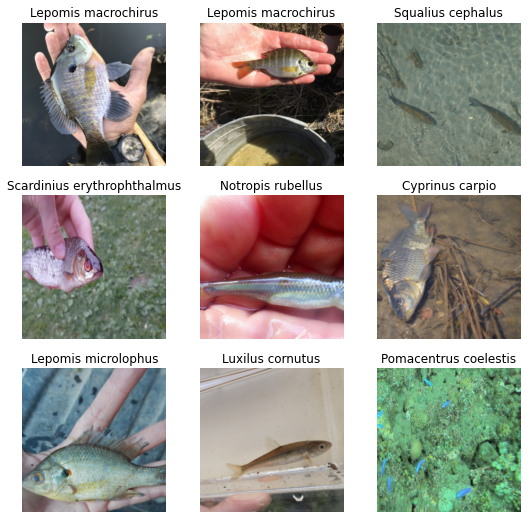

In [9]:
dls.show_batch(nrows=3, ncols=3)

In [10]:
class Resnet34CustomModel(Module):
    def __init__(self, encoder, head):
        self.encoder = encoder
        self.head = head
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.head(x)
        return x

In [11]:
def custom_splitter(model):
    return [params(model.encoder),
            params(model.head)]

In [12]:
model_meta[resnet34]

{'cut': -2,
 'split': <function fastai.vision.learner._resnet_split(m)>,
 'stats': ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])}

In [13]:
model = resnet34
body = create_body(model, cut=-2)
head = create_head(512*2,dls.c)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [14]:
model = Resnet34CustomModel(body, head)

In [18]:
dls.vocab

['Abramis brama', 'Abudefduf abdominalis', 'Abudefduf bengalensis', 'Abudefduf saxatilis', 'Abudefduf septemfasciatus', 'Abudefduf sexfasciatus', 'Abudefduf sordidus', 'Abudefduf troschelii', 'Abudefduf vaigiensis', 'Acanthochromis polyacanthus', 'Acrossocheilus paradoxus', 'Alburnus alburnus', 'Alburnus arborella', 'Ambloplites rupestris', 'Amblyglyphidodon aureus', 'Amblyglyphidodon curacao', 'Amblyglyphidodon leucogaster', 'Amphiprion bicinctus', 'Amphiprion chrysopterus', 'Amphiprion clarkii', 'Amphiprion frenatus', 'Amphiprion melanopus', 'Amphiprion ocellaris', 'Amphiprion percula', 'Amphiprion perideraion', 'Amphiprion polymnus', 'Barbus barbus', 'Barbus plebejus', 'Campostoma anomalum', 'Candidia barbata', 'Carassius auratus', 'Carassius gibelio', 'Centrarchus macropterus', 'Chromis atripectoralis', 'Chromis chromis', 'Chromis cyanea', 'Chromis hypsilepis', 'Chromis margaritifer', 'Chromis multilineata', 'Chromis notata', 'Chromis punctipinnis', 'Chromis ternatensis', 'Chromis 

In [19]:
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [20]:
learn.summary()

Resnet34CustomModel (Input shape: ['64 x 3 x 336 x 336'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 168 x 168  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 168 x 168  128        True      
________________________________________________________________
ReLU                 64 x 64 x 168 x 168  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 84 x 84    0          False     
________________________________________________________________
Conv2d               64 x 64 x 84 x 84    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 84 x 84    128        True      
________________________________________________________________
ReLU                 64 x 64 x 84 x 84    0          False     
________________________________________

In [21]:
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.659242,1.398007,0.615002,07:26


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-6,1e-4))

In [ ]:
learn.save('species144-nobranch-fepochs1-uepochs12')

In [ ]:
learn.export('species144-nobranch-fepochs1-uepochs12')

In [15]:
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.628715,1.376649,0.619516,07:25


In [16]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=0)

epoch,train_loss,valid_loss,accuracy,time
0,1.567265,1.352568,0.624783,07:12
1,1.497741,1.303214,0.634911,07:12
2,1.436170,1.251128,0.649265,07:14
3,1.413935,1.209295,0.659220,07:15
4,1.312271,1.179850,0.666049,07:14
5,1.265086,1.155666,0.673805,07:14
6,1.300934,1.141249,0.675888,07:14
7,1.255195,1.137045,0.679245,07:14
8,1.257550,1.128531,0.680692,07:12
9,1.238312,1.129019,0.678956,07:13


In [17]:
learn.save('species144-resnet34-nobranch-fepochs1-uepochs10of50')

Path('models/species144-nobranch-fepochs1-uepochs10of50.pth')

In [18]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=10)
learn.save('species144-resnet34-nobranch-fepochs1-uepochs15of50')

epoch,train_loss,valid_loss,accuracy,time
0,1.246954,1.120899,0.680229,07:14
1,1.269701,1.110712,0.682834,07:14
2,1.213293,1.081629,0.692036,07:13
3,1.160660,1.069559,0.695509,07:17
4,1.203447,1.069210,0.696435,07:16


Path('models/species144-nobranch-fepochs1-uepochs15of50.pth')

In [15]:
def continue_training(pth_filename):
    learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy,
                       splitter=custom_splitter).to_fp16()
    learn.load(pth_filename)
    learn.unfreeze()
    return learn

In [16]:
learn = continue_training('species144-resnet34-nobranch-fepochs1-uepochs15of50')

In [17]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=15)
learn.save('species144-resnet34-nobranch-fepochs1-uepochs25of50')

epoch,train_loss,valid_loss,accuracy,time
0,1.170364,1.078433,0.691399,07:24
1,1.175050,1.054175,0.698403,07:11
2,1.184878,1.039402,0.703091,07:10
3,1.128656,1.027993,0.704769,07:10
4,1.105794,1.011797,0.710615,07:11
5,1.047267,1.011623,0.708184,07:11
6,1.071075,0.999656,0.711830,07:11
7,1.078010,0.991819,0.713103,07:11
8,1.077363,0.990102,0.713740,07:12
9,1.044292,0.993240,0.713451,07:11


Path('models/species144-resnet34-nobranch-fepochs1-uepochs25of50.pth')

In [18]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=25)
learn.save('species144-resnet34-nobranch-fepochs1-uepochs30of50')

epoch,train_loss,valid_loss,accuracy,time
0,1.052126,0.987197,0.716981,07:13
1,1.072017,0.974687,0.718717,07:13
2,1.052639,0.967593,0.721669,07:11
3,1.030216,0.960442,0.722711,07:12
4,0.999882,0.957889,0.722653,07:12


Path('models/species144-resnet34-nobranch-fepochs1-uepochs30of50.pth')

In [19]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=30)
learn.save('species144-resnet34-nobranch-fepochs1-uepochs35of50')

epoch,train_loss,valid_loss,accuracy,time
0,1.013181,0.959499,0.722016,07:13
1,1.018908,0.949750,0.726241,07:12
2,0.967729,0.941506,0.727804,07:12
3,0.994086,0.936529,0.730756,07:12
4,0.962291,0.939229,0.729598,07:12


Path('models/species144-resnet34-nobranch-fepochs1-uepochs35of50.pth')

In [16]:
learn = continue_training('species144-resnet34-nobranch-fepochs1-uepochs35of50')

In [17]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=35)
learn.save('species144-resnet34-nobranch-fepochs1-uepochs45of50')

epoch,train_loss,valid_loss,accuracy,time
0,0.967373,0.936697,0.728846,07:17
1,0.950808,0.931112,0.731913,07:11
2,0.970787,0.925202,0.733187,07:10
3,0.943827,0.919181,0.734749,07:11
4,0.953830,0.911946,0.737527,07:13
5,0.960581,0.898757,0.740653,07:12
6,0.929473,0.897365,0.741695,07:13
7,0.928842,0.893940,0.741868,07:12
8,0.951123,0.891759,0.742968,07:13
9,0.877513,0.891448,0.741463,07:12


Path('models/species144-resnet34-nobranch-fepochs1-uepochs45of50.pth')

In [18]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=45)
learn.save('species144-resnet34-nobranch-fepochs1-uepochs50of50')

epoch,train_loss,valid_loss,accuracy,time
0,0.885682,0.889562,0.744183,07:11
1,0.917044,0.884048,0.744878,07:13
2,0.951941,0.875531,0.746904,07:13
3,0.844445,0.875507,0.747193,07:12
4,0.864652,0.875313,0.747714,07:10


Path('models/species144-resnet34-nobranch-fepochs1-uepochs50of50.pth')

In [19]:
learn.export('species144-resnet34-nobranch-fepochs1-uepochs50')

# 1-Branch-CNN

In [15]:
model = resnet34
body = create_body(model, cut=-2)
body

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [16]:
stem = body[0:4]
stem

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
)

In [17]:
block1, block2, block3, block4 = body[4], body[5], body[6], body[7]
block1

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, mome

In [18]:
head = create_head(512*2,dls.c)
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=144, bias=False)
)

In [19]:
def custom_get_y(o):
    fine_label = o['Specie']
    coarse1_label = o['Family']
    return [coarse1_label, fine_label]

In [20]:
class Resnet34CustomModel(Module):
    def __init__(self, encoder, head):
        self.encoder = encoder
        self.stem = encoder[0:4]
        self.block1 = body[4]
        self.block2 = body[5]
        self.branch1 = create_head(128*2, len(set(df['Family'])))
        self.block3 = body[6]
        self.block4 = body[7]
        self.head = head
    
    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        coarse1_label = self.branch1(x)
        x = self.block3(x)
        x = self.block4(x)
        fine_label = self.head(x)
        return {
                'fine_label': fine_label,
                'coarse1_label': coarse1_label
               }

In [21]:
def loss_func(out, targ):
    return nn.CrossEntropyLoss()(out['fine_label'], targ['fine_label']) + \
            nn.CrossEntropyLoss()(out['coarse1_label'], targ['coarse1_label'])

In [22]:
# def custom_accuracy(inp, targ, axis=-1):
#     pred1,targ1 = flatten_check(inp['label1'].argmax(dim=axis), targ['label1'])
#     acc1 = (pred1 == targ1).float().mean()
#     pred2,targ2 = flatten_check(inp['label2'].argmax(dim=axis), targ['label2'])
#     acc2 = (pred2 == targ2).float().mean()
#     return (acc1+acc2)/2

def custom_accuracy(inp, targ, axis=-1):
    pred1,targ1 = flatten_check(inp['fine_label'].argmax(dim=axis), targ['fine_label'])
    acc1 = (pred1 == targ1).float().mean()
    return acc1

In [23]:
model = Resnet34CustomModel(body, head)

In [24]:
class CustomCategorize(DisplayedTransform):
    "Reversible transform of category string to `vocab` id"
    loss_func,order=CrossEntropyLossFlat(),1
    def __init__(self, vocab=None, vocab_coarse1=None, vocab_coarse2=None, sort=True, add_na=False, num_y=1):
        store_attr()
        self.vocab = None if vocab is None else CategoryMap(vocab, sort=sort, add_na=add_na)
        self.vocab_coarse1 = None if vocab_coarse1 is None else CategoryMap(vocab_coarse1, sort=sort, add_na=add_na)

    def setups(self, dsets):
        fine_dsets = [d[1] for d in dsets]
        coarse1_dsets = [d[0] for d in dsets]
        if self.vocab is None and dsets is not None: self.vocab = CategoryMap(fine_dsets, sort=self.sort, add_na=self.add_na)
        if self.vocab_coarse1 is None and dsets is not None: self.vocab_coarse1 = CategoryMap(coarse1_dsets, sort=self.sort, add_na=self.add_na)
        self.c = len(self.vocab)

    def encodes(self, o): return {'fine_label': TensorCategory(self.vocab.o2i[o[1]]),
                                  'coarse1_label': TensorCategory(self.vocab_coarse1.o2i[o[0]])
                                 }
    def decodes(self, o): return Category      (self.vocab    [o])

In [25]:
def CustomCategoryBlock(vocab=None, sort=True, add_na=False, num_y=1):
    "`TransformBlock` for single-label categorical targets"
    return TransformBlock(type_tfms=CustomCategorize(vocab=vocab, sort=sort, add_na=add_na))

In [26]:
def custom_splitter(model):
    return [params(model.stem),
            params(model.block1),
            params(model.block2),
            params(model.block3),
            params(model.block4),
            params(model.head)]

In [27]:
fishes = DataBlock(blocks = (ImageBlock, CustomCategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=custom_get_y,
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

In [28]:
dls.train_ds, dls.valid_ds

((#69110) [(PILImage mode=RGB size=768x1024, {'fine_label': TensorCategory(62), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(58), 'coarse1_label': TensorCategory(2)}),(PILImage mode=RGB size=768x1024, {'fine_label': TensorCategory(79), 'coarse1_label': TensorCategory(0)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(52), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=768x1024, {'fine_label': TensorCategory(6), 'coarse1_label': TensorCategory(2)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(69), 'coarse1_label': TensorCategory(0)}),(PILImage mode=RGB size=1024x715, {'fine_label': TensorCategory(130), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(108), 'coarse1_label': TensorCategory(1)}),(PILImage mode=RGB size=1024x768, {'fine_label': TensorCategory(118), 'coarse1_label': TensorCategory(0)}),(PILImage mode=RGB size=1024x768,

In [29]:
dls.vocab, dls.vocab_coarse1

(['Abramis brama', 'Abudefduf abdominalis', 'Abudefduf bengalensis', 'Abudefduf saxatilis', 'Abudefduf septemfasciatus', 'Abudefduf sexfasciatus', 'Abudefduf sordidus', 'Abudefduf troschelii', 'Abudefduf vaigiensis', 'Acanthochromis polyacanthus', 'Acrossocheilus paradoxus', 'Alburnus alburnus', 'Alburnus arborella', 'Ambloplites rupestris', 'Amblyglyphidodon aureus', 'Amblyglyphidodon curacao', 'Amblyglyphidodon leucogaster', 'Amphiprion bicinctus', 'Amphiprion chrysopterus', 'Amphiprion clarkii', 'Amphiprion frenatus', 'Amphiprion melanopus', 'Amphiprion ocellaris', 'Amphiprion percula', 'Amphiprion perideraion', 'Amphiprion polymnus', 'Barbus barbus', 'Barbus plebejus', 'Campostoma anomalum', 'Candidia barbata', 'Carassius auratus', 'Carassius gibelio', 'Centrarchus macropterus', 'Chromis atripectoralis', 'Chromis chromis', 'Chromis cyanea', 'Chromis hypsilepis', 'Chromis margaritifer', 'Chromis multilineata', 'Chromis notata', 'Chromis punctipinnis', 'Chromis ternatensis', 'Chromis

In [78]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [79]:
learn.summary()

Resnet34CustomModel (Input shape: ['64 x 3 x 336 x 336'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 168 x 168  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 168 x 168  128        True      
________________________________________________________________
ReLU                 64 x 64 x 168 x 168  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 84 x 84    0          False     
________________________________________________________________
Conv2d               64 x 64 x 84 x 84    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 84 x 84    128        True      
________________________________________________________________
ReLU                 64 x 64 x 84 x 84    0          False     
________________________________________

In [80]:
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,custom_accuracy,time
0,2.667388,2.258007,0.598623,07:17


In [81]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,custom_accuracy,time
0,2.470648,2.144418,0.623915,07:20
1,2.328269,1.977194,0.657599,07:18
2,2.052402,1.813075,0.690821,07:20
3,1.883363,1.656309,0.721322,07:19
4,1.746699,1.591457,0.730409,07:20
5,1.636584,1.525381,0.748351,07:20
6,1.524753,1.459437,0.758016,07:21
7,1.427552,1.427318,0.768376,07:19
8,1.376289,1.400833,0.772890,07:19
9,1.283336,1.382901,0.774742,07:19


In [82]:
learn.save('species144-resnet34-branch1-fepochs1-uepochs12')

Path('models/species144-resnet34-branch1-fepochs1-uepochs12.pth')

In [84]:
learn.export('species144-resnet34-branch1-fepochs1-uepochs12')

In [23]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [24]:
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,custom_accuracy,time
0,2.619900,2.250211,0.606957,07:17


In [25]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=0)

epoch,train_loss,valid_loss,custom_accuracy,time
0,2.499218,2.137460,0.634275,07:14
1,2.251555,1.966071,0.666744,07:14
2,2.027544,1.791130,0.698518,07:13
3,1.850416,1.683010,0.724737,07:14
4,1.749286,1.605033,0.736081,07:14
5,1.585442,1.528599,0.753270,07:15
6,1.549463,1.480557,0.758768,07:16
7,1.481172,1.454171,0.768029,07:16
8,1.403764,1.453288,0.769071,07:14
9,1.413946,1.462438,0.768318,07:15


In [26]:
learn.save('species144-resnet34-branch1-fepochs1-uepochs10of50')

Path('models/species144-branch1-fepochs1-uepochs10of50.pth')

In [27]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=10)
learn.save('species144-resnet34-branch1-fepochs1-uepochs15of50')

epoch,train_loss,valid_loss,custom_accuracy,time
0,1.476951,1.487308,0.756048,07:15
1,1.479373,1.464505,0.758421,07:15
2,1.352222,1.405053,0.775669,07:14
3,1.250798,1.357578,0.787128,07:14
4,1.218913,1.358342,0.786434,07:13


Path('models/species144-branch1-fepochs1-uepochs15of50.pth')

In [30]:
def continue_training(pth_filename):
    learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
    learn.load(pth_filename)
    learn.unfreeze()
    return learn

In [27]:
learn = continue_training('species144-resnet34-branch1-fepochs1-uepochs15of50')

In [28]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=15)
learn.save('species144-resnet34-branch1-fepochs1-uepochs25of50')

epoch,train_loss,valid_loss,custom_accuracy,time
0,1.220933,1.371561,0.781051,07:25
1,1.301875,1.410208,0.769128,07:20
2,1.249032,1.388873,0.772312,07:18
3,1.229054,1.358738,0.778331,07:20
4,1.150009,1.323904,0.785681,07:20
5,1.080706,1.307232,0.788054,07:20
6,0.998118,1.294739,0.796736,07:23
7,0.950057,1.273072,0.799340,07:19
8,0.923547,1.278471,0.799803,07:18
9,0.888534,1.269247,0.799919,07:22


Path('models/species144-resnet34-branch1-fepochs1-uepochs25of50.pth')

In [29]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=25)
learn.save('species144-resnet34-branch1-fepochs1-uepochs30of50')

epoch,train_loss,valid_loss,custom_accuracy,time
0,1.002402,1.325424,0.783945,07:19
1,1.016130,1.326223,0.783366,07:18
2,0.922944,1.299137,0.791874,07:20
3,0.843651,1.268686,0.800093,07:19
4,0.838198,1.260300,0.800903,07:17


Path('models/species144-resnet34-branch1-fepochs1-uepochs30of50.pth')

In [30]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=30)
learn.save('species144-resnet34-branch1-fepochs1-uepochs35of50')

epoch,train_loss,valid_loss,custom_accuracy,time
0,0.891999,1.343377,0.783540,07:21
1,0.940406,1.326749,0.785681,07:21
2,0.857429,1.295718,0.796157,07:20
3,0.781119,1.265985,0.801192,07:21
4,0.749637,1.251838,0.805070,07:23


Path('models/species144-resnet34-branch1-fepochs1-uepochs35of50.pth')

In [31]:
learn = continue_training('species144-resnet34-branch1-fepochs1-uepochs35of50')

In [32]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=35)
learn.save('species144-resnet34-branch1-fepochs1-uepochs40of50')

epoch,train_loss,valid_loss,custom_accuracy,time
0,0.759868,1.282573,0.803912,07:21
1,0.831829,1.311354,0.792048,07:14
2,0.880966,1.323353,0.788633,07:16
3,0.821104,1.309519,0.791006,07:16
4,0.790451,1.302530,0.795173,07:15
5,0.730542,1.279007,0.801829,07:17
6,0.681153,1.261153,0.807211,07:17
7,0.663826,1.248276,0.809527,07:16
8,0.641798,1.251270,0.812478,07:15
9,0.626409,1.255151,0.812073,07:16


Path('models/species144-resnet34-branch1-fepochs1-uepochs40of50.pth')

In [33]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=45)
learn.save('species144-resnet34-branch1-fepochs1-uepochs50of50')

epoch,train_loss,valid_loss,custom_accuracy,time
0,0.723565,1.339577,0.791180,07:15
1,0.761574,1.335201,0.792974,07:14
2,0.697341,1.302653,0.801308,07:13
3,0.620820,1.256142,0.808890,07:14
4,0.609259,1.256484,0.813173,07:15


Path('models/species144-resnet34-branch1-fepochs1-uepochs50of50.pth')

# 2-Branch-CNN

In [ ]:
model = resnet34
body = create_body(model, cut=-2)head = create_head(512*2,dls.c)
stem = body[0:4]
block1, block2, block3, block4 = body[4], body[5], body[6], body[7]
head = create_head(512*2,dls.c)

In [ ]:
def custom_get_y(o):
    fine_label = o['Specie']
    coarse2_label = o['Family']
    coarse1_label = o['Order']
    return [coarse1_label, coarse2_label, fine_label]

In [ ]:
class Resnet34CustomModel(Module):
    def __init__(self, encoder, head):
        self.encoder = encoder
        self.stem = encoder[0:4]
        self.block1 = body[4]
        self.branch1 = create_head(64*2, len(set(df['Order'])))
        self.block2 = body[5]
        self.branch2 = create_head(128*2, len(set(df['Family'])))
        self.block3 = body[6]
        self.block4 = body[7]
        self.head = head
    
    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        coarse1_label = self.branch1(x)
        x = self.block2(x)
        coarse2_label = self.branch2(x)
        x = self.block3(x)
        x = self.block4(x)
        fine_label = self.head(x)
        return {
                'fine_label': fine_label,
                'coarse2_label': coarse1_label,
                'coarse1_label': coarse1_label
               }

In [ ]:
def loss_func(out, targ):
    return nn.CrossEntropyLoss()(out['fine_label'], targ['fine_label']) + \
            nn.CrossEntropyLoss()(out['coarse1_label'], targ['coarse1_label']) + \
            nn.CrossEntropyLoss()(out['coarse2_label'], targ['coarse2_label'])

In [ ]:
def custom_accuracy(inp, targ, axis=-1):
    pred1,targ1 = flatten_check(inp['fine_label'].argmax(dim=axis), targ['fine_label'])
    acc1 = (pred1 == targ1).float().mean()
    return acc1

In [ ]:
model = Resnet34CustomModel(body, head)

In [ ]:
class CustomCategorize(DisplayedTransform):
    "Reversible transform of category string to `vocab` id"
    loss_func,order=CrossEntropyLossFlat(),1
    def __init__(self, vocab=None, vocab_coarse1=None, vocab_coarse2=None, sort=True, add_na=False, num_y=1):
        store_attr()
        self.vocab = None if vocab is None else CategoryMap(vocab, sort=sort, add_na=add_na)
        self.vocab_coarse1 = None if vocab_coarse1 is None else CategoryMap(vocab_coarse1, sort=sort, add_na=add_na)
        self.vocab_coarse2 = None if vocab_coarse2 is None else CategoryMap(vocab_coarse2, sort=sort, add_na=add_na)

    def setups(self, dsets):
        fine_dsets = [d[2] for d in dsets]
        coarse2_dsets = [d[1] for d in dsets]
        coarse1_dsets = [d[0] for d in dsets]
        if self.vocab is None and dsets is not None: self.vocab = CategoryMap(fine_dsets, sort=self.sort, add_na=self.add_na)
        if self.vocab_coarse1 is None and dsets is not None: self.vocab_coarse1 = CategoryMap(coarse1_dsets, sort=self.sort, add_na=self.add_na)
        if self.vocab_coarse2 is None and dsets is not None: self.vocab_coarse2 = CategoryMap(coarse2_dsets, sort=self.sort, add_na=self.add_na)
        self.c = len(self.vocab)

    def encodes(self, o): return {'fine_label': TensorCategory(self.vocab.o2i[o[2]]),
                                  'coarse2_label': TensorCategory(self.vocab_coarse2.o2i[o[1]]),
                                  'coarse1_label': TensorCategory(self.vocab_coarse1.o2i[o[0]])
                                 }
    def decodes(self, o): return Category      (self.vocab    [o])

In [ ]:
def CustomCategoryBlock(vocab=None, sort=True, add_na=False, num_y=1):
    "`TransformBlock` for single-label categorical targets"
    return TransformBlock(type_tfms=CustomCategorize(vocab=vocab, sort=sort, add_na=add_na))

In [ ]:
def custom_splitter(model):
    return [params(model.stem),
            params(model.block1),
            params(model.block2),
            params(model.block3),
            params(model.block4),
            params(model.head)]

In [ ]:
fishes = DataBlock(blocks = (ImageBlock, CustomCategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=custom_get_y,
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

In [ ]:
dls.train_ds, dls.valid_ds

In [ ]:
dls.vocab, dls.vocab_coarse2, dls.vocab_coarse1

In [ ]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [ ]:
learn.summary()

In [ ]:
learn.fit_one_cycle(1, 3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-6,1e-4))

In [ ]:
learn.save('species144-resnet34-branch2-fepochs1-uepochs12')

In [ ]:
learn.export('species144-resnet34-branch2-fepochs1-uepochs12')

In [ ]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [ ]:
learn.fit_one_cycle(1, 3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=0)

In [ ]:
learn.save('species144-resnet34-branch2-fepochs1-uepochs10of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=10)
learn.save('species144-resnet34-branch2-fepochs1-uepochs15of50')

In [ ]:
def continue_training(pth_filename):
    learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
    learn.load(pth_filename)
    learn.unfreeze()
    return learn

In [ ]:
learn = continue_training('species144-resnet34-branch2-fepochs1-uepochs15of50')

In [ ]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=15)
learn.save('species144-resnet34-branch2-fepochs1-uepochs25of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=25)
learn.save('species144-resnet34-branch2-fepochs1-uepochs30of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=30)
learn.save('species144-resnet34-branch2-fepochs1-uepochs35of50')

In [ ]:
learn = continue_training('species144-resnet34-branch2-fepochs1-uepochs35of50')

In [ ]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=35)
learn.save('species144-resnet34-branch2-fepochs1-uepochs40of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=45)
learn.save('species144-resnet34-branch2-fepochs1-uepochs50of50')

# 2-Branch-CNN (B)

In [ ]:
model = resnet34
body = create_body(model, cut=-2)head = create_head(512*2,dls.c)
stem = body[0:4]
block1, block2, block3, block4 = body[4], body[5], body[6], body[7]
head = create_head(512*2,dls.c)

In [ ]:
def custom_get_y(o):
    fine_label = o['Specie']
    coarse2_label = o['Family']
    coarse1_label = o['Order']
    return [coarse1_label, coarse2_label, fine_label]

In [ ]:
class Resnet34CustomModel(Module):
    def __init__(self, encoder, head):
        self.encoder = encoder
        self.stem = encoder[0:4]
        self.block1 = body[4]
        self.block2 = body[5]
        self.branch1 = create_head(128*2, len(set(df['Family'])))
        self.block3 = body[6]
        self.branch2 = create_head(256*2, len(set(df['Order'])))
        self.block4 = body[7]
        self.head = head
    
    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        coarse1_label = self.branch1(x)
        x = self.block3(x)
        coarse2_label = self.branch2(x)
        x = self.block4(x)
        fine_label = self.head(x)
        return {
                'fine_label': fine_label,
                'coarse2_label': coarse1_label,
                'coarse1_label': coarse1_label
               }

In [ ]:
def loss_func(out, targ):
    return nn.CrossEntropyLoss()(out['fine_label'], targ['fine_label']) + \
            nn.CrossEntropyLoss()(out['coarse1_label'], targ['coarse1_label']) + \
            nn.CrossEntropyLoss()(out['coarse2_label'], targ['coarse2_label'])

In [ ]:
def custom_accuracy(inp, targ, axis=-1):
    pred1,targ1 = flatten_check(inp['fine_label'].argmax(dim=axis), targ['fine_label'])
    acc1 = (pred1 == targ1).float().mean()
    return acc1

In [ ]:
model = Resnet34CustomModel(body, head)

In [ ]:
class CustomCategorize(DisplayedTransform):
    "Reversible transform of category string to `vocab` id"
    loss_func,order=CrossEntropyLossFlat(),1
    def __init__(self, vocab=None, vocab_coarse1=None, vocab_coarse2=None, sort=True, add_na=False, num_y=1):
        store_attr()
        self.vocab = None if vocab is None else CategoryMap(vocab, sort=sort, add_na=add_na)
        self.vocab_coarse1 = None if vocab_coarse1 is None else CategoryMap(vocab_coarse1, sort=sort, add_na=add_na)
        self.vocab_coarse2 = None if vocab_coarse2 is None else CategoryMap(vocab_coarse2, sort=sort, add_na=add_na)

    def setups(self, dsets):
        fine_dsets = [d[2] for d in dsets]
        coarse2_dsets = [d[1] for d in dsets]
        coarse1_dsets = [d[0] for d in dsets]
        if self.vocab is None and dsets is not None: self.vocab = CategoryMap(fine_dsets, sort=self.sort, add_na=self.add_na)
        if self.vocab_coarse1 is None and dsets is not None: self.vocab_coarse1 = CategoryMap(coarse1_dsets, sort=self.sort, add_na=self.add_na)
        if self.vocab_coarse2 is None and dsets is not None: self.vocab_coarse2 = CategoryMap(coarse2_dsets, sort=self.sort, add_na=self.add_na)
        self.c = len(self.vocab)

    def encodes(self, o): return {'fine_label': TensorCategory(self.vocab.o2i[o[2]]),
                                  'coarse2_label': TensorCategory(self.vocab_coarse2.o2i[o[1]]),
                                  'coarse1_label': TensorCategory(self.vocab_coarse1.o2i[o[0]])
                                 }
    def decodes(self, o): return Category      (self.vocab    [o])

In [ ]:
def CustomCategoryBlock(vocab=None, sort=True, add_na=False, num_y=1):
    "`TransformBlock` for single-label categorical targets"
    return TransformBlock(type_tfms=CustomCategorize(vocab=vocab, sort=sort, add_na=add_na))

In [ ]:
def custom_splitter(model):
    return [params(model.stem),
            params(model.block1),
            params(model.block2),
            params(model.block3),
            params(model.block4),
            params(model.head)]

In [ ]:
fishes = DataBlock(blocks = (ImageBlock, CustomCategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=custom_get_y,
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

In [ ]:
dls.train_ds, dls.valid_ds

In [ ]:
dls.vocab, dls.vocab_coarse2, dls.vocab_coarse1

In [ ]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [ ]:
learn.summary()

In [ ]:
learn.fit_one_cycle(1, 3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-6,1e-4))

In [ ]:
learn.save('species144-resnet34-branch2b-fepochs1-uepochs12')

In [ ]:
learn.export('species144-resnet34-branch2b-fepochs1-uepochs12')

In [ ]:
learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
learn.freeze()

In [ ]:
learn.fit_one_cycle(1, 3e-3)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=0)

In [ ]:
learn.save('species144-resnet34-branch2b-fepochs1-uepochs10of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=10)
learn.save('species144-resnet34-branch2b-fepochs1-uepochs15of50')

In [ ]:
def continue_training(pth_filename):
    learn = Learner(dls, model, loss_func=loss_func, metrics=custom_accuracy,
                   splitter=custom_splitter).to_fp16()
    learn.load(pth_filename)
    learn.unfreeze()
    return learn

In [ ]:
learn = continue_training('species144-resnet34-branch2b-fepochs1-uepochs15of50')

In [ ]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=15)
learn.save('species144-resnet34-branch2b-fepochs1-uepochs25of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=25)
learn.save('species144-resnet34-branch2b-fepochs1-uepochs30of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=30)
learn.save('species144-resnet34-branch2b-fepochs1-uepochs35of50')

In [ ]:
learn = continue_training('species144-resnet34-branch2b-fepochs1-uepochs35of50')

In [ ]:
learn.fit_one_cycle(10, slice(1e-6,1e-4), tot_epochs=50, start_epochs=35)
learn.save('species144-resnet34-branch2b-fepochs1-uepochs40of50')

In [ ]:
learn.fit_one_cycle(5, slice(1e-6,1e-4), tot_epochs=50, start_epochs=45)
learn.save('species144-resnet34-branch2b-fepochs1-uepochs50of50')